# **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import csv
import os
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution1D , Flatten , Dense , Dropout , Softmax , MaxPooling1D
from keras.optimizers import Adam
from keras import regularizers

In [ ]:
#!pip install np_utils

In [ ]:
from keras.utils import plot_model

In [ ]:
from keras.utils import to_categorical

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# **Fetch the Dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/101.csv
/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/101annotations.txt
/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/100annotations.txt
/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/100.csv
/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/103.csv
/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/102annotations.txt
/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/103annotations.txt
/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/102.csv
/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/105annotations.txt
/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/104.csv
/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/105.csv
/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/104annotations.txt
/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/106annotations.txt
/content/drive/MyDrive/Col

# **Exploring the Dataset** ('N', 'L', 'R', 'A', 'V')

In [ ]:
os.environ["CUDA_VISIBLE_DIVICES"]='0'      #Sets which GPUs CUDA should use: '0' for first GPU only

In [ ]:
classes= ['N', 'L', 'R', 'A', 'V']

In [ ]:
length_classes=len(classes)

In [ ]:
count_classes=[0] * length_classes

In [ ]:
count_classes

[0, 0, 0, 0, 0]

In [ ]:
from __future__ import annotations
path = '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database'
filenames = next(os.walk(path)) [2]     #Lists filenames in path directory, excluding subdirectories contents
records = list()
annotations = list()
filenames.sort()
#effectively assigns the list of names of the non-directory files located directly in the directory specified by path to the variable filenames.

In [ ]:
filenames

['100.csv',
 '100annotations.txt',
 '101.csv',
 '101annotations.txt',
 '102.csv',
 '102annotations.txt',
 '103.csv',
 '103annotations.txt',
 '104.csv',
 '104annotations.txt',
 '105.csv',
 '105annotations.txt',
 '106.csv',
 '106annotations.txt',
 '107.csv',
 '107annotations.txt',
 '108.csv',
 '108annotations.txt',
 '109.csv',
 '109annotations.txt',
 '111.csv',
 '111annotations.txt',
 '112.csv',
 '112annotations.txt',
 '113.csv',
 '113annotations.txt',
 '114.csv',
 '114annotations.txt',
 '115.csv',
 '115annotations.txt',
 '116.csv',
 '116annotations.txt',
 '117.csv',
 '117annotations.txt',
 '118.csv',
 '118annotations.txt',
 '119.csv',
 '119annotations.txt',
 '121.csv',
 '121annotations.txt',
 '122.csv',
 '122annotations.txt',
 '123.csv',
 '123annotations.txt',
 '124.csv',
 '124annotations.txt',
 '200.csv',
 '200annotations.txt',
 '201.csv',
 '201annotations.txt',
 '202.csv',
 '202annotations.txt',
 '203.csv',
 '203annotations.txt',
 '205.csv',
 '205annotations.txt',
 '207.csv',
 '207ann

In [ ]:
# Segrefating filenames and annotations

for f in filenames:
    filename, file_extension = os.path.splitext(f)

    if(file_extension=='.csv'):
        records.append(path+'/'+filename+file_extension)
    else:
        annotations.append(path+'/'+filename+file_extension)

In [ ]:
annotations

['/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/100annotations.txt',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/101annotations.txt',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/102annotations.txt',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/103annotations.txt',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/104annotations.txt',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/105annotations.txt',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/106annotations.txt',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/107annotations.txt',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/108annotations.txt',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/109annotations.txt',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/111annotations.txt',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/112annotation

In [ ]:
records

['/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/100.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/101.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/102.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/103.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/104.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/105.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/106.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/107.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/108.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/109.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/111.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/112.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitbih_database/113.csv',
 '/content/drive/MyDrive/Colab Notebooks/Paper/mitb

# **Pre-Processing for One Signal**

In [ ]:
temporary=[]
with open(records[9],'r') as csvfile:
    filereader = csv.reader(csvfile,delimiter=',',quotechar='|')
    row_index = -1
    for row in filereader:
        if(row_index >= 0):
            temporary.insert(row_index, int(row[1]))
        row_index += 1

In [ ]:
temporary[:25]

[1059,
 1059,
 1059,
 1059,
 1059,
 1059,
 1059,
 1059,
 1059,
 1060,
 1061,
 1066,
 1070,
 1068,
 1063,
 1056,
 1043,
 1036,
 1041,
 1054,
 1063,
 1056,
 1037,
 1035,
 1048]

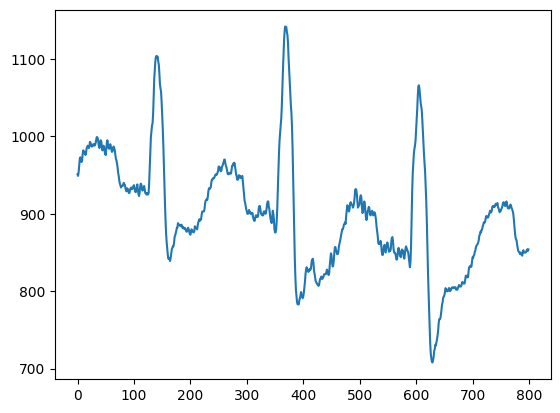

In [ ]:
plt.plot(temporary[200:1000])

In [ ]:
temporary_2=temporary

In [ ]:
#To perform denoising on a one-dimensional signal using wavelet-based thresholding.

def de_noise(data):
  w = pywt.Wavelet('sym4')
  max_level = pywt.dwt_max_level(len(data),w.dec_len)
  threshold =  0.04                          #Threshold value for filteration process (Here we use soft threshold)

  coefficient = pywt.wavedec(data,'sym4',level=max_level)

  for i in range (1, len(coefficient)):
    coefficient[i] = pywt.threshold(coefficient[i] , threshold * max(coefficient[i]))

  data_rec = pywt.waverec(coefficient,'sym4')
  return data_rec

In [ ]:
temporary = de_noise(temporary)

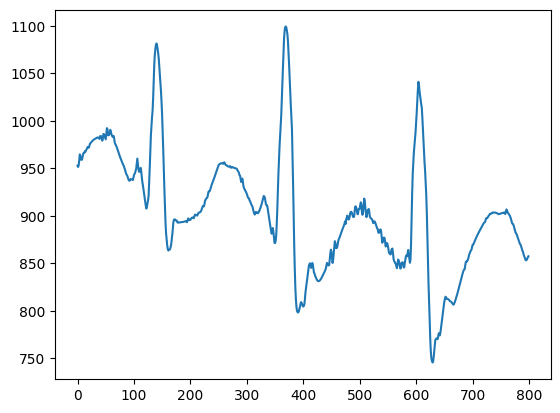

In [ ]:
plt.plot(temporary[200:1000])

**Min-Max Scaling**

In [ ]:
# To scale the data to a specified range, typically between 0 and 1

scaler = MinMaxScaler()
temporary = temporary.reshape(-1,1)
temporary = scaler.fit_transform(temporary)

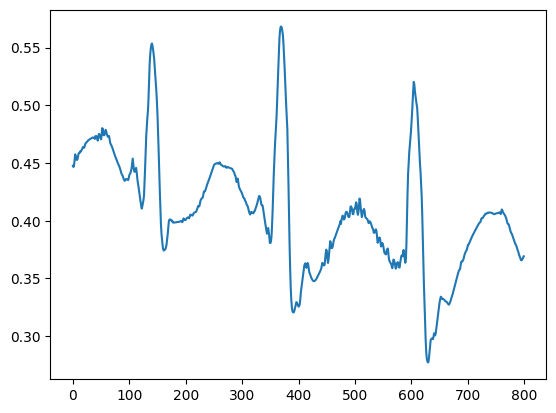

In [ ]:
plt.plot(temporary[200:1000])

# **Preprocessing: Denoising, Scaling, Classes Segmentation**

<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:30: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:30: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-30-ba6cdac6391a>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-30-ba6cdac6391a>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-30-ba6cdac6391a>:30: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-30-ba6cdac6391a>:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1 and not example_beat_printed:


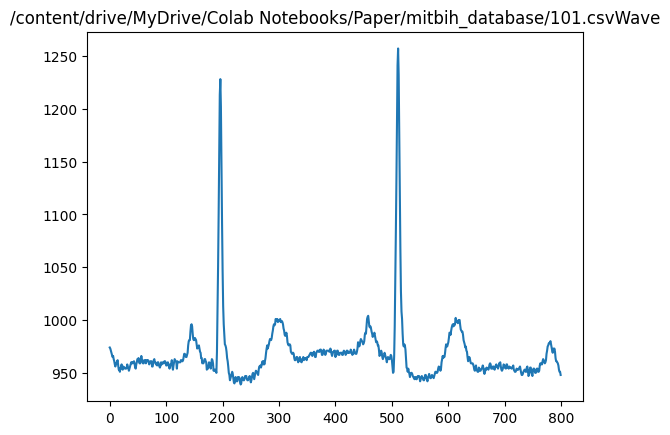

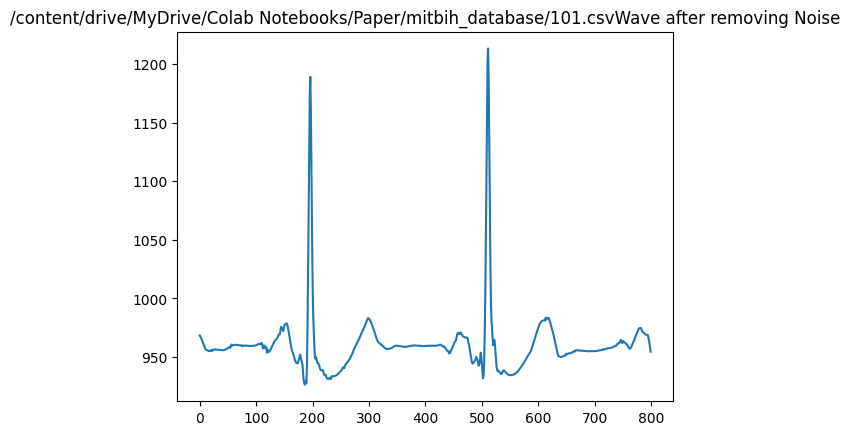

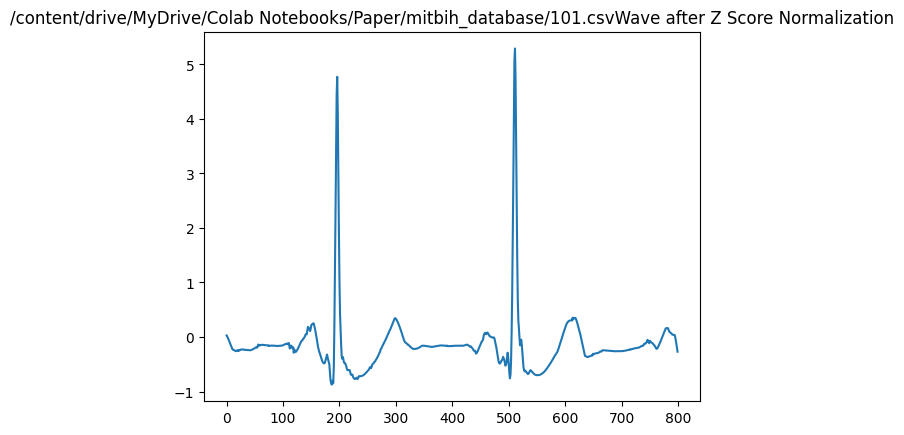

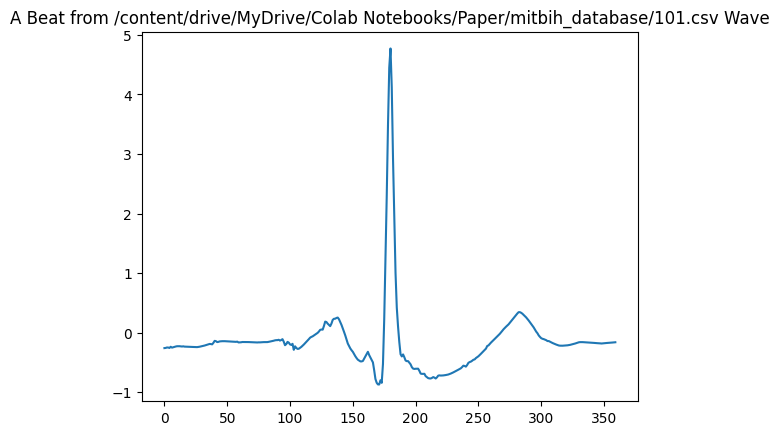

(100012, 360) (100012,)


In [ ]:
window_size = 180
X = list()
y = list()
for r in range (0,len(records)):
  signals = []
  with open(records[r],'r') as csvfile:
    filereader = csv.reader(csvfile,delimiter=',',quotechar='|')
    row_index = -1
    for row in filereader:
        if(row_index >= 0):
            signals.insert(row_index, int(row[1]))
        row_index += 1


  if r is 1:
    plt.title(records[1] + "Wave")
    plt.plot(signals[200:1000])
    plt.show()


  signals = de_noise(signals)
  if r is 1:
    plt.title(records[1] + "Wave after removing Noise")
    plt.plot(signals[200:1000])
    plt.show()



  signals = stats.zscore(signals)
  if r is 1:
    plt.title(records[1] + "Wave after Z Score Normalization")
    plt.plot(signals[200:1000])
    plt.show()


  example_beat_printed = False
  with open(annotations[r], 'r') as fileID:
      data = fileID.readlines()
      beat = list()

      for d in range(1, len(data)): # 0 index is Chart Head
          splitted = data[d].split(' ')
          splitted = filter(None, splitted)
          next(splitted) # Time... Clipping
          pos = int(next(splitted)) # Sample ID
          arrhythmia_type = next(splitted) # Type
          if(arrhythmia_type in classes):
              arrhythmia_index = classes.index(arrhythmia_type)
#                 if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
#                     pass
#                 else:
              count_classes[arrhythmia_index] += 1
              if(window_size <= pos and pos < (len(signals) - window_size)):
                  beat = signals[pos-window_size:pos+window_size]     ## REPLACE WITH R-PEAK DETECTION
                  # Plot an example to a beat
                  if r is 1 and not example_beat_printed:
                      plt.title("A Beat from " + records[1] + " Wave")
                      plt.plot(beat)
                      plt.show()
                      example_beat_printed = True

                  X.append(beat)
                  y.append(arrhythmia_index)

# data shape
print(np.shape(X), np.shape(y))


In [ ]:
count_classes

[75052, 8075, 7259, 2546, 7130]

In [ ]:
for i in range(len(X)):
  X[i]=np.append(X[i],y[i])

print (np.shape(X))

X_train_df = pd.DataFrame(X)
X_train_df.head()

(100012, 361)


,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
0,0.018228,0.022953,0.058424,0.077107,0.095080,0.105492,0.112325,0.116982,0.119703,0.122254,...,-0.013640,-0.013518,-0.012969,-0.010249,-0.013186,-0.027581,0.010994,-0.026885,-0.020095,0.0
1,-0.366827,-0.344524,-0.320039,-0.330324,-0.299629,-0.292238,-0.283900,-0.275759,-0.267345,-0.257942,...,-0.140611,-0.140669,-0.140735,-0.141352,-0.140082,-0.136719,-0.144822,-0.139946,-0.142478,0.0
2,-0.171359,-0.140344,-0.109854,-0.078079,-0.048978,-0.034990,-0.028194,-0.024550,-0.024222,-0.023859,...,0.001325,0.007875,0.015828,0.025088,0.030657,0.026670,0.056487,0.028112,0.028259,0.0
3,-0.186526,-0.182575,-0.177326,-0.171800,-0.165320,-0.158725,-0.151677,-0.144942,-0.140875,-0.138009,...,0.021386,0.032036,0.043188,0.058269,0.074966,0.076706,0.073569,0.093104,0.116388,0.0
4,-0.369240,-0.368380,-0.344557,-0.314211,-0.295571,-0.279271,-0.261415,-0.243202,-0.221928,-0.200658,...,-0.019342,-0.014265,-0.009238,-0.004046,0.001153,0.006449,0.011785,0.016524,0.021073,0.0


0.0    75011
1.0     8071
2.0     7255
4.0     7129
3.0     2546
Name: 360, dtype: int64


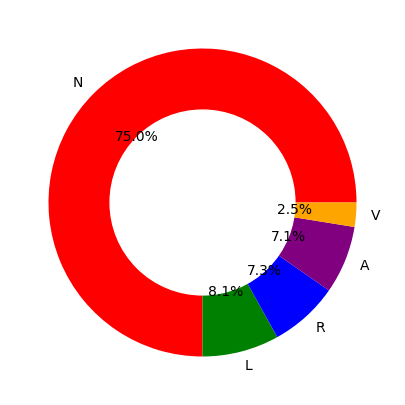

In [ ]:
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()          #to calculate how many times each unique value appears in the last column of y_df
print(per_class)
plt.figure(figsize = (20,5))
my_circle = plt.Circle((0,0), 0.6 , color = 'white')
plt.pie(per_class,labels=['N', 'L', 'R', 'A', 'V'],colors = ['red','green','blue','purple','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
df_1 = (X_train_df[X_train_df[X_train_df.shape[1]-1]==1])
df_2=X_train_df[X_train_df[X_train_df.shape[1]-1]==2]
df_3=X_train_df[X_train_df[X_train_df.shape[1]-1]==3]
df_4=X_train_df[X_train_df[X_train_df.shape[1]-1]==4]
df_0=X_train_df[X_train_df[X_train_df.shape[1]-1]==0].sample(n=10000,random_state=42)
df_1_sample = resample(df_1,replace=True,n_samples=7500,random_state=122)
df_2_sample = resample(df_2,replace=True,n_samples=7500,random_state=122)
df_4_sample = resample(df_4,replace=True,n_samples=7500,random_state=122)
df_3_sample = resample(df_3,replace=True,n_samples=5500,random_state=122)

X_train_df = pd.concat([df_0,df_1_sample,df_2_sample,df_3_sample,df_4_sample])

0.0    10000
1.0     7500
2.0     7500
4.0     7500
3.0     5500
Name: 360, dtype: int64


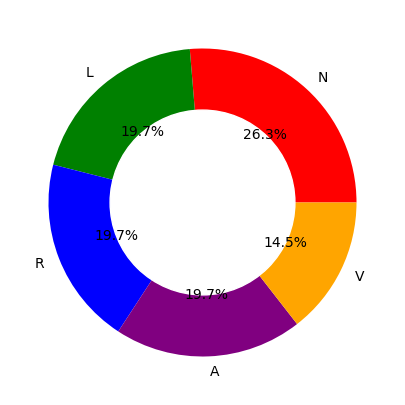

In [ ]:
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()          #to calculate how many times each unique value appears in the last column of y_df
print(per_class)
plt.figure(figsize = (20,5))
my_circle = plt.Circle((0,0), 0.6 , color = 'white')
plt.pie(per_class,labels=['N', 'L', 'R', 'A', 'V'],colors = ['red','green','blue','purple','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Text(0.5, 1.0, 'N (Normal Beat)')

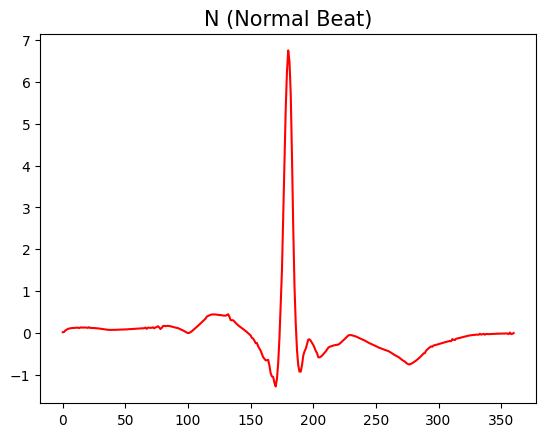

In [ ]:
i=0
while y[i]!=0:
  i=i+1

plt.plot(X[i],color='red')
plt.title('N (Normal Beat)',fontsize=15)

Text(0.5, 1.0, 'L (Left Bundle Branch Block)')

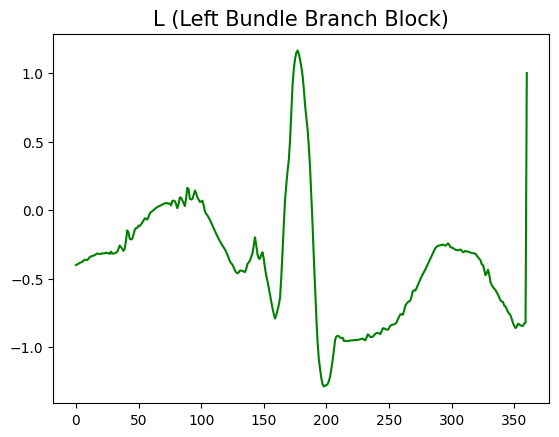

In [ ]:
i=0
while y[i]!=1:
  i=i+1

plt.plot(X[i],color='green')
plt.title('L (Left Bundle Branch Block)',fontsize=15)

Text(0.5, 1.0, 'R (Right Bundle Branch Block)')

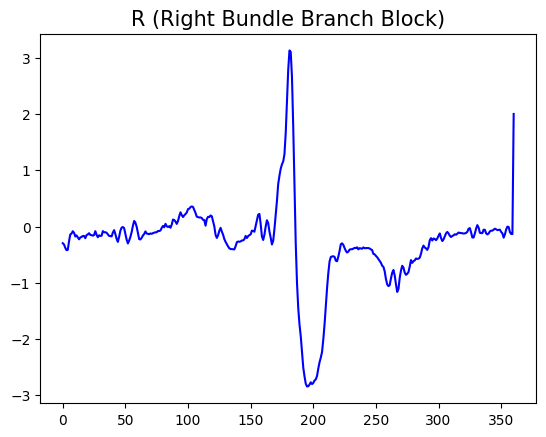

In [ ]:
i=0
while y[i]!=2:
  i=i+1

plt.plot(X[i],color='blue')
plt.title('R (Right Bundle Branch Block)',fontsize=15)

Text(0.5, 1.0, 'A (Artial Premature Beat)')

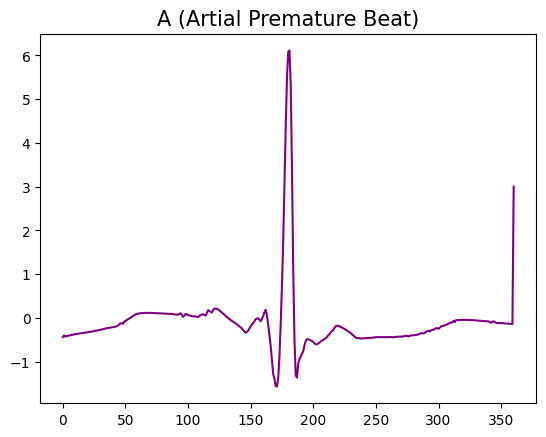

In [ ]:
i=0
while y[i]!=3:
  i=i+1

plt.plot(X[i],color='purple')
plt.title('A (Artial Premature Beat)',fontsize=15)

Text(0.5, 1.0, 'V (Premature Ventricular Contraction)')

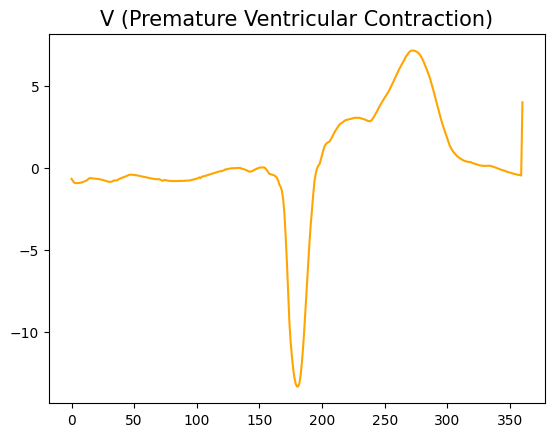

In [ ]:
i=0
while y[i]!=4:
  i=i+1

plt.plot(X[i],color='orange')
plt.title('V (Premature Ventricular Contraction)',fontsize=15)

# **Train_Test Split**

In [ ]:
train , test = train_test_split(X_train_df,test_size = 0.20)

print("X_train: ",np.shape(train))
print("X_test: ",np.shape(test))

X_train:  (30400, 361)
X_test:  (7600, 361)


In [ ]:
target_train = train[train.shape[1]-1]
target_test = test[test.shape[1]-1]
y_train = to_categorical(target_train)              #One Hot Encoding
y_test = to_categorical(target_test)

print(np.shape(y_train),np.shape(y_test))

(30400, 5) (7600, 5)


In [ ]:
X_train = train.iloc[:,:train.shape[1]-1].values
X_test = test.iloc[:,:test.shape[1]-1].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)
print(np.shape(X_train), np.shape(X_test))

(30400, 360, 1) (7600, 360, 1)


# **Build Model**

In [ ]:
model = Sequential()


model.add(Convolution1D(filters=16,kernel_size=7,strides=1,padding='same',activation='relu',input_shape=(360,1)))
model.add(MaxPooling1D(pool_size=3,strides=2))

model.add(Convolution1D(filters=32,kernel_size=9,strides=1,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=3,strides=2))

model.add(Convolution1D(filters=64,kernel_size=11,strides=1,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=3,strides=2))

model.add(Convolution1D(filters=128,kernel_size=13,strides=1,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=3,strides=2))

#model.add(Convolution1D(filters=256,kernel_size=15,strides=1,padding='same',activation='relu'))
#model.add(MaxPooling1D(pool_size=3,strides=2))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(100,activation='relu'))

model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 360, 16)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 179, 16)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 179, 32)           4640      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 89, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 89, 64)            22592     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 44, 64)            0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train , y_train , batch_size=30 , epochs=40 , verbose=1 , validation_data=(X_test,y_test))

Epoch 1/40
1014/1014 [==============================] - 70s 67ms/step - loss: 0.2346 - accuracy: 0.9224 - val_loss: 0.0752 - val_accuracy: 0.9767
Epoch 2/40
1014/1014 [==============================] - 68s 67ms/step - loss: 0.0900 - accuracy: 0.9697 - val_loss: 0.0598 - val_accuracy: 0.9792
Epoch 3/40
1014/1014 [==============================] - 66s 65ms/step - loss: 0.0670 - accuracy: 0.9783 - val_loss: 0.0425 - val_accuracy: 0.9870
Epoch 4/40
1014/1014 [==============================] - 68s 67ms/step - loss: 0.0573 - accuracy: 0.9808 - val_loss: 0.0461 - val_accuracy: 0.9863
Epoch 5/40
1014/1014 [==============================] - 66s 65ms/step - loss: 0.0496 - accuracy: 0.9835 - val_loss: 0.0331 - val_accuracy: 0.9884
Epoch 6/40
1014/1014 [==============================] - 66s 65ms/step - loss: 0.0391 - accuracy: 0.9870 - val_loss: 0.0279 - val_accuracy: 0.9911
Epoch 7/40
1014/1014 [==============================] - 66s 65ms/step - loss: 0.0364 - accuracy: 0.9877 - val_loss: 0.0327 -

In [ ]:
score = model.evaluate(X_test, y_test)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

238/238 [==============================] - 4s 15ms/step - loss: 0.0365 - accuracy: 0.9936
Test Loss: 0.036536820232868195
Test accuracy: 0.9935526251792908


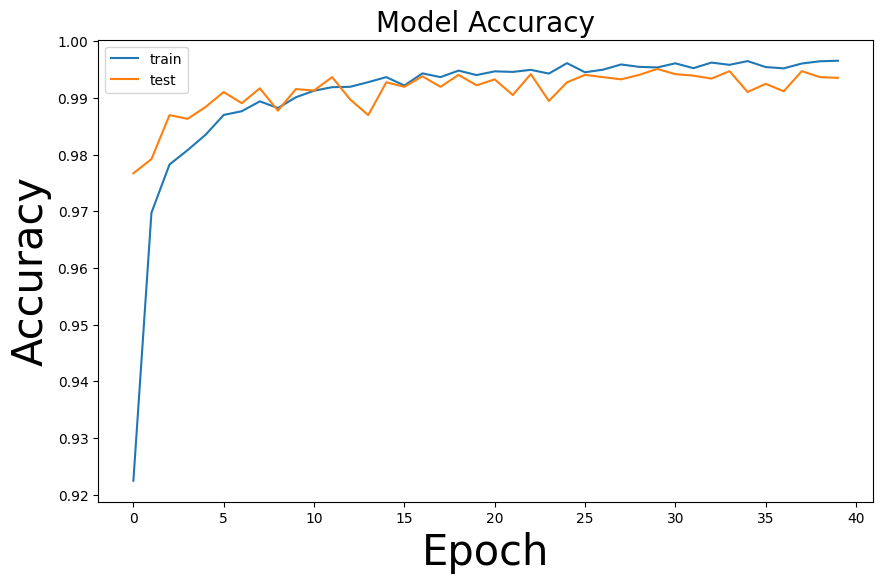

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=30)
plt.xlabel('Epoch',fontsize=30)
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy_plot')
plt.show()

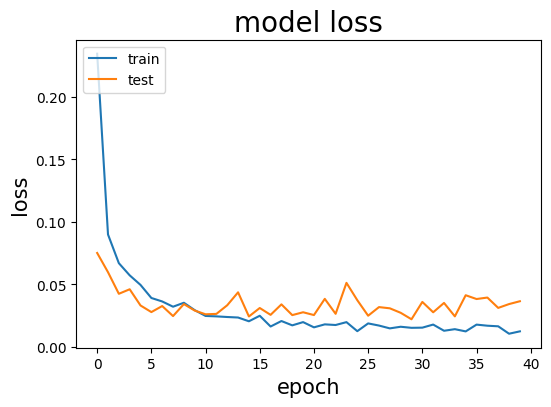

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss', fontsize=20)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_plot')
plt.show()

238/238 [==============================] - 4s 15ms/step


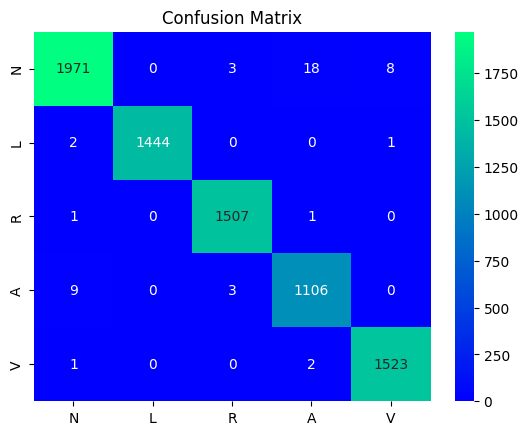

In [ ]:
y_true=[]
for element in y_test:
    y_true.append(np.argmax(element))
prediction_proba=model.predict(X_test)
prediction=np.argmax(prediction_proba,axis=1)
ax=plt.subplot()
custCnnConfMat = confusion_matrix(y_true, prediction)
sns.heatmap(custCnnConfMat, annot=True,fmt='d', cmap='winter',ax=ax)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.savefig('cm')

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true , prediction , target_names = classes , digits=4)
print(report)

              precision    recall  f1-score   support

           N     0.9934    0.9855    0.9895      2000
           L     1.0000    0.9979    0.9990      1447
           R     0.9960    0.9987    0.9974      1509
           A     0.9814    0.9893    0.9853      1118
           V     0.9941    0.9980    0.9961      1526

    accuracy                         0.9936      7600
   macro avg     0.9930    0.9939    0.9934      7600
weighted avg     0.9936    0.9936    0.9936      7600



In [ ]:
conf_matrix = confusion_matrix(y_true,prediction)


In [ ]:
print('Confusion Matrix : \n', conf_matrix)

Confusion Matrix : 
 [[1971    0    3   18    8]
 [   2 1444    0    0    1]
 [   1    0 1507    1    0]
 [   9    0    3 1106    0]
 [   1    0    0    2 1523]]


In [ ]:
conf_matrix = np.array(conf_matrix)

# Calculate TP, FP, TN, FN for each class
for i in range(conf_matrix.shape[0]):
    TP = conf_matrix[i, i]
    FP = np.sum(conf_matrix[:, i]) - TP
    FN = np.sum(conf_matrix[i, :]) - TP
    TN = np.sum(conf_matrix) - TP - FP - FN

In [ ]:
specificity = TN/(TN+FP)
specificity

0.998518274613105